## Importar librerías 
### Carga de datos CSV

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='latin-1', delimiter=';', engine='python')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,AID Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,End Year,End Month,CPI
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,NaN,Km2,NaN,NaN,1900,NaN,1900,NaN,"2,849084409"
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,NaN,Km2,NaN,NaN,1900,NaN,1900,NaN,"2,849084409"
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,NaN,8.0,Richter,14,-91,1902,4.0,1902,4.0,"2,963047785"
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,NaN,NaN,NaN,NaN,1902,4.0,1902,4.0,"2,963047785"
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,NaN,NaN,NaN,NaN,1902,10.0,1902,10.0,"2,963047785"


In [12]:
df.shape

(16636, 27)

## Valores faltantes

In [3]:
df.isnull().sum()

Dis No                   0
Year                     0
Seq                      0
Disaster Subgroup        0
Disaster Type            0
Disaster Subtype      3323
Country                  0
ISO                      0
Region                   0
Continent                0
Location              1811
Origin               12551
Associated Dis       13043
Associated Dis2      15873
OFDA Response        14920
Appeal               14077
Declaration          13293
AID Contribution     15860
Dis Mag Value        11572
Dis Mag Scale         1220
Latitude             13861
Longitude            13861
Start Year               0
Start Month            395
End Year                 0
End Month              700
CPI                    106
dtype: int64

In [7]:
df.columns.values

array(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'AID Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'End Year', 'End Month', 'CPI'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Associated Dis2    763 non-null    object 
 14  OFDA Response      1716 non-null   object 
 15  Appeal             2559 non-null   object 
 16  Declaration        334

<Axes: >

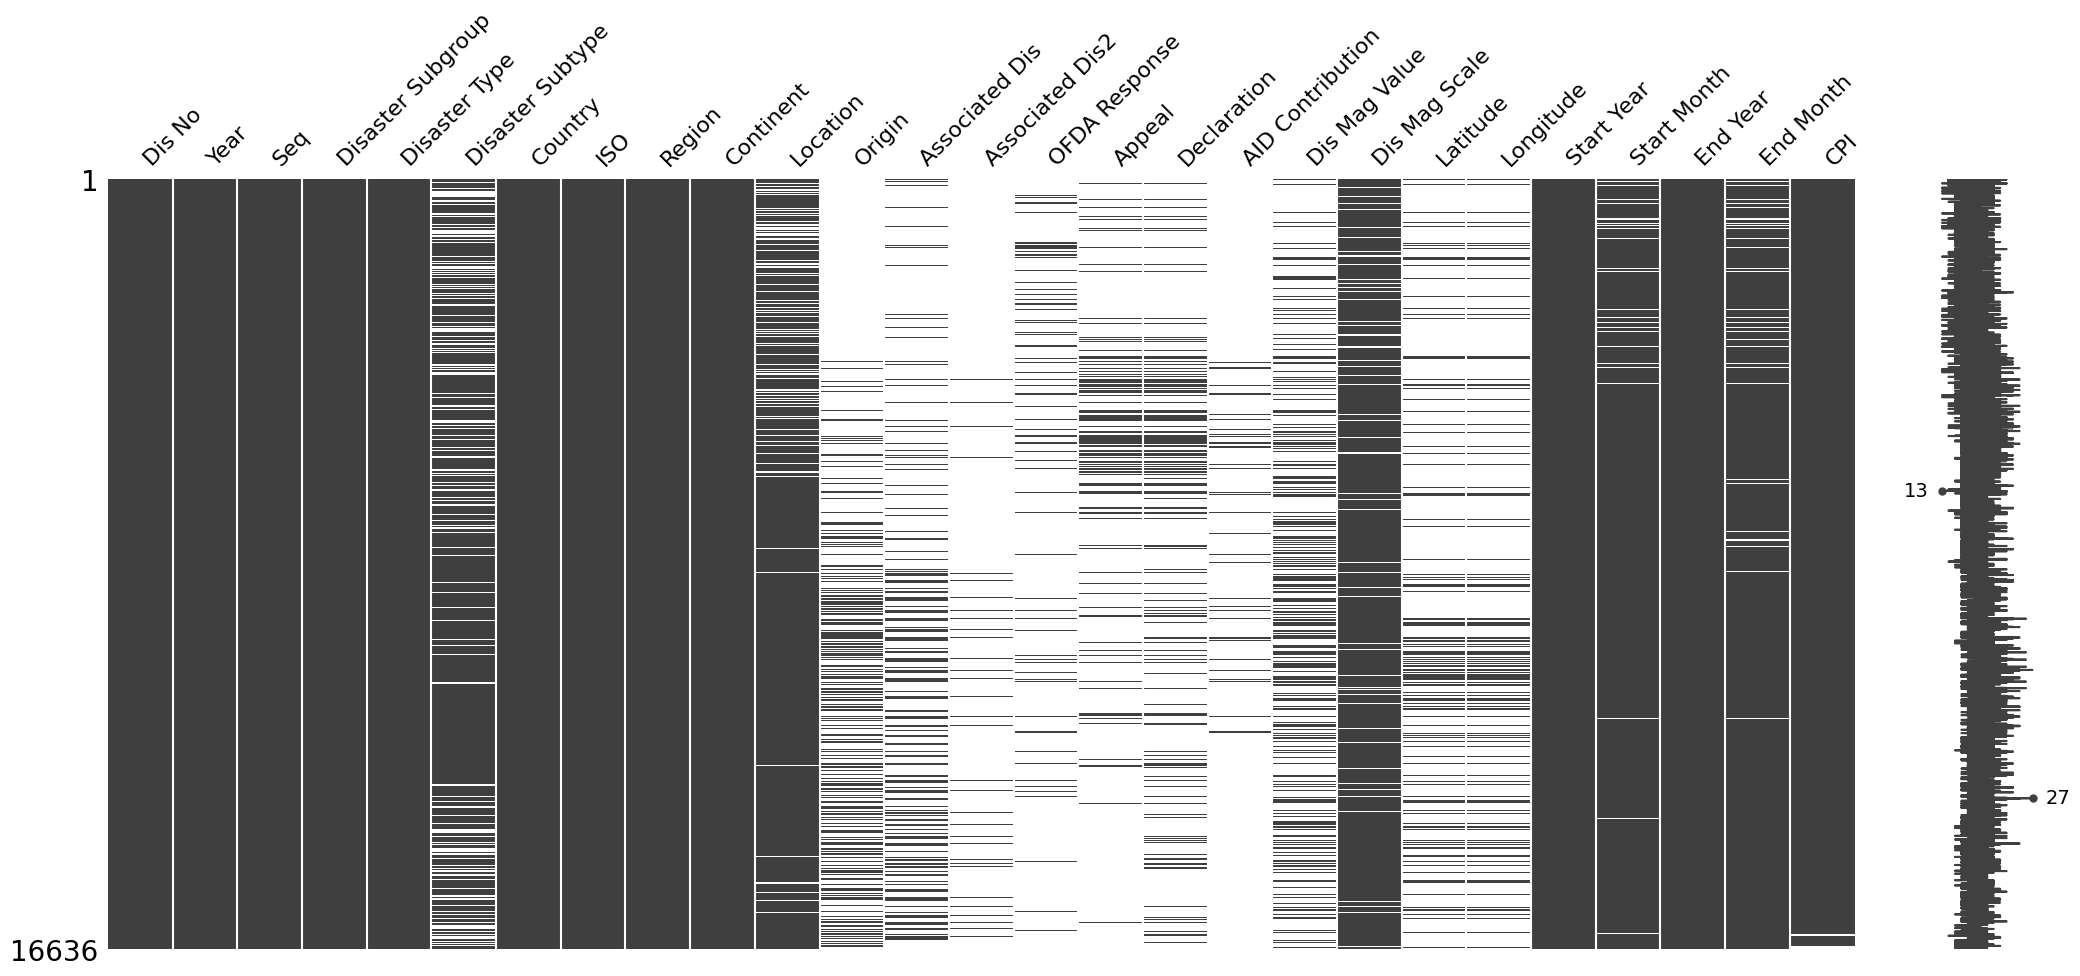

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

## Análisis univariante

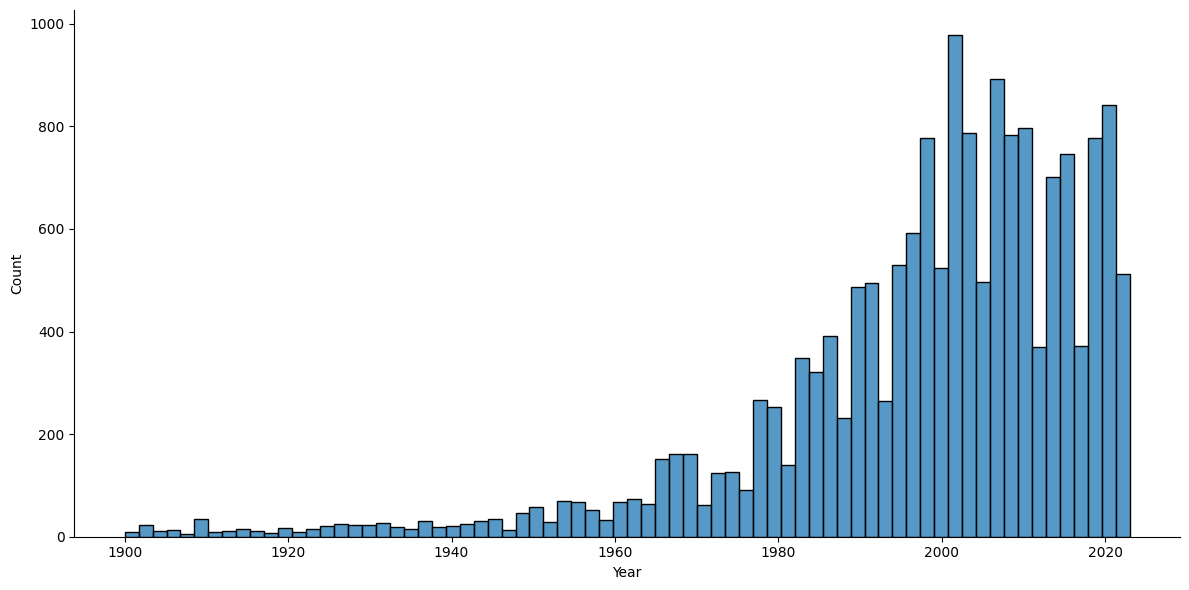

In [21]:
sns.displot(data=df, x='Year', height=6, aspect=2)

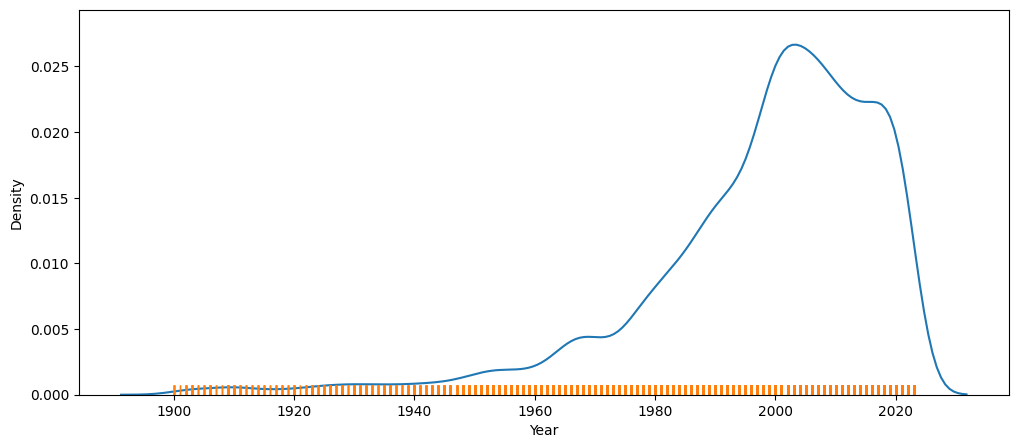

In [25]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='Year')
sns.rugplot(data=df, x='Year')
plt.ticklabel_format(style='plain', axis='x')

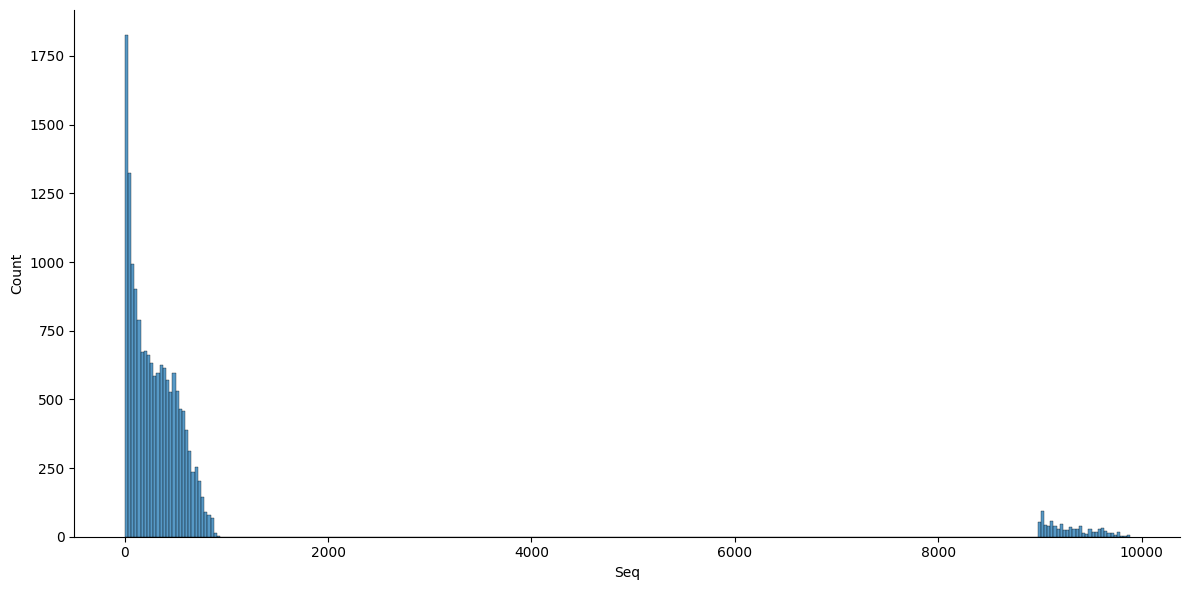

In [30]:
sns.displot(data=df, x='Seq', height=6, aspect=2)

In [34]:
def calc_missing(df):
    missing_colums = [col for col in df.columns if df [col].isnull().sum() > 0]
    for col in missing_colums:
        null_count = df[col].isnull().sum()
        total_count = df.shape[0]
        null_percent = (null_count / total_count) * 100

        print (f"{col} {null_count} / {total_count} {null_percent:.2f} %")


In [35]:
calc_missing(df)

Disaster Subtype 3323 / 16636 19.97 %
Location 1811 / 16636 10.89 %
Origin 12551 / 16636 75.44 %
Associated Dis 13043 / 16636 78.40 %
Associated Dis2 15873 / 16636 95.41 %
OFDA Response 14920 / 16636 89.69 %
Appeal 14077 / 16636 84.62 %
Declaration 13293 / 16636 79.91 %
AID Contribution 15860 / 16636 95.34 %
Dis Mag Value 11572 / 16636 69.56 %
Dis Mag Scale 1220 / 16636 7.33 %
Latitude 13861 / 16636 83.32 %
Longitude 13861 / 16636 83.32 %
Start Month 395 / 16636 2.37 %
End Month 700 / 16636 4.21 %
CPI 106 / 16636 0.64 %


In [42]:
disaster_subgoup = df['Disaster Subgroup'].unique()
print('Calculo Disaster Subgroup:\n', df['Disaster Subgroup'].value_counts())

Calculo Disaster Subgroup:
 Hydrological         6612
Meteorological       5235
Geophysical          1912
Biological           1614
Climatological       1262
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64


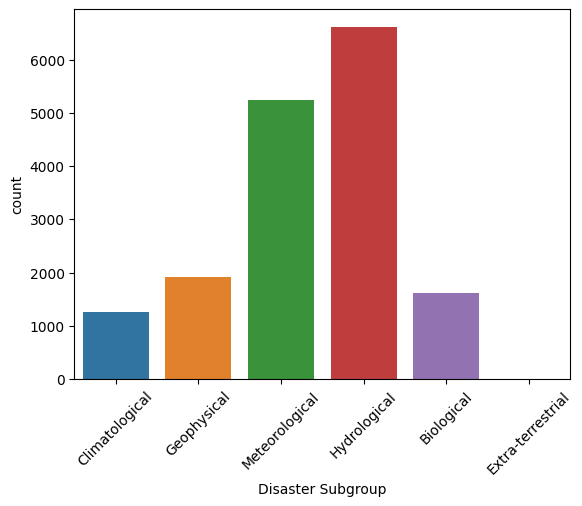

In [46]:
sns.countplot(data=df, x='Disaster Subgroup')
plt.xticks(rotation=45);